# BUSSINESS UNDERSTANDING

Afrika merupakan sebuah benua yang memiliki tingkat konsumsi minyak mentah terendah didunia. Walaupun demikian, konsumsi minyak mentah di benua Afrika masih mengandalkan import dari negara-negara lain seperti Indonesia dan negaralainnya dikarenakan produksi minyak mentah di afrika sendiri belum mampu menyukupi kebutuhannya sendiri. 

Dikarenakan hal tersebut, dibuatlah Program untuk melakukan prediksi terhadap jumlah produksi minyak di benua Afrika sehingga pemerintah setempat mampu untuk melakukan perencanaan angaran biaya export minyak dari negara lain dengan efektif.

# Deskripsi Library Yang Digunakan
- Library pandas digunakan untuk memproses data dan memanipulasi data. 

- Library numpy digunakan untuk melakukan perhitungan scientifik seperti matriks, aljabar, statistik dll.

- LIBRARY VISUALISASI digunakan untuk memvisualisasikan data dalam bentuk plot maupun diagram.

- LIBRARY ANALISIS TIME SERIES digunakan untuk metode Forecasting yang merupakan metode yang memiliki column time series.
Library yang digunakan pada case ini adalah untuk menampilkan grafik sehingga untuk membantu dalam proses melakukan analisa.

Library yang digunakan untuk perbandingan metode forecasting dalam kasus ini adalah Algoritma Simple Single Exponensial, Double Exponensial dan ARIMA.
Dalam ke-tiga Algoritma tersebut akan dilakukan perbandingan  algoritma manakah yang paling sesuai dan mendekati dari nilai Dataset. sehingga dapat digunakan dalam proses prediksi kedepannya. sehinga salah-satu dari ketiganya akan dipilih dan digunakan sebagai main program agar dapat ditampilkan kepada user.


In [41]:
import pandas as pd
import numpy as np 

#Library untuk Visualisai
import matplotlib.pyplot as plt
import seaborn as sns

#Library untuk analisis time series
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Library yang digunakan untuk forecasting
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# DATA UNDERSTANDING

# Memanggil Dataset

Dataset yang digunakan pada kasus ini bersumber dari website kaggle dan dapan diakses dengan link berikut : https://www.kaggle.com/datasets/pralabhpoudel/world-energy-consumption.

Pada Dataset diatas, saya memilih data Jumlah produksi minyak di wilayah Afrika Perkapita. Dimana dalam Dataset data di mulai sejak tahun 1911 sampai dengan tahun 2019.

File Dataset memiliki format scv dan disimpan pada directory yang sama dengan file python dengan mempermudah dalam melakukan pemanggilan file Dataset.

In [42]:
df = pd.read_csv('oil_prod_percapita.csv')

# Pendeskripsian Dataset
Pada Dataset Jumlah produksi minyak  per capita di wilayah Afrika yang telah digunakan diatas, terdapat dua kolom yang saling berkaitan yaitu :

- Year Column dengan tipe data Integer (Bilangan Bulat) dan
 
- Oil_prod_per_capita Column dengan tipe data yang sama yaitu float (Bilangan desimal).

In [43]:
df.head()

,Year,oil_prod_per_capita
0,1911,3.059
1,1912,28.211
2,1913,12.929
3,1914,98.082
4,1915,28.992


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 109 non-null    int64  
 1   oil_prod_per_capita  109 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.8 KB


# DATA PREPARATION

# Transformasi Data

Pada bagian ini, Year Column akan dilakukan trasformasi data. Yang awalnya hanya memiliki format tahun saja sehingga dirubah menjadi format date time (tahun, bulan, tanggal).

In [45]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [46]:
df.set_index(['Year'], inplace=True)

In [47]:
df.head()
# format pada Year Column sudah dirubah menjadi format date time (tahun, bulan, tanggal)

,oil_prod_per_capita
Year,
1911-01-01,3.059
1912-01-01,28.211
1913-01-01,12.929
1914-01-01,98.082
1915-01-01,28.992


In [48]:
df.index.min(), df.index.max()
#Code untuk melihat nilai minimum dan nilai maxsimum dari dataset yang digunakan

(Timestamp('1911-01-01 00:00:00'), Timestamp('2019-01-01 00:00:00'))

In [49]:
if (df.index.max() - df.index.min() == 214): print('Data Is Continue')

In [50]:
df.index.freq = 'YS'

# VISUALITATION (MODELING)

# Analisa Time Series

Pada grafik yang muncul dibawah, garis x (Horizontal) adalah Year Column dan garis y (vertikal) adalah Oil_prod_per_capita.

Pada bagian ini akan dilakukan proses untuk mengetahui apakah grafik untuk dataset yang digunakan stasioner atau tidak.

<Axes: xlabel='Year'>

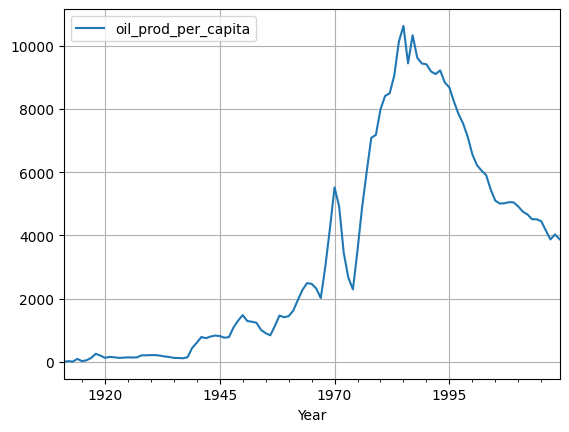

In [51]:
df.plot(grid=True)

In [52]:
train_df = df.loc[:'2009-01-01']
test_df = df.loc['2010-1-01':]
# Data yang diambil untuk data train dan data test

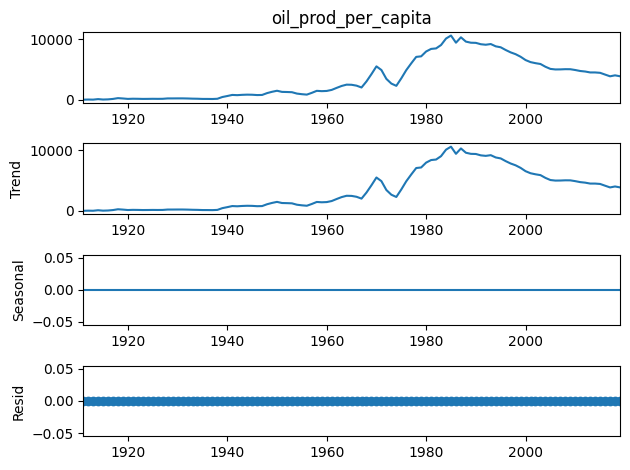

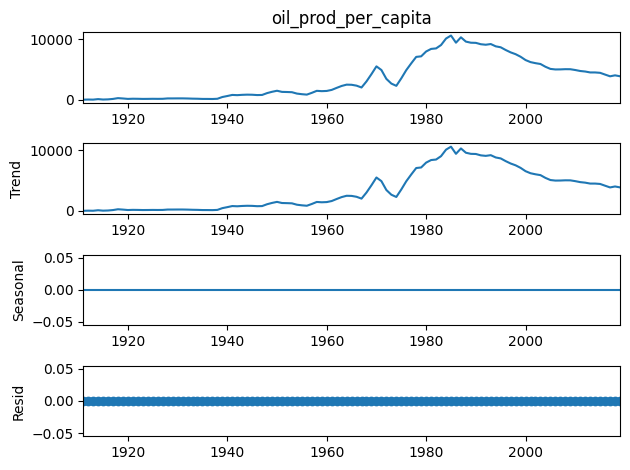

In [53]:
decompose_add =seasonal_decompose(df['oil_prod_per_capita'])
decompose_add.plot()

In [54]:
def adf_test(timeseries):
    print ('Hasil dari Testing Dickey-Fuller')
    print ('----------------------------------------')
    adftest = adfuller(timeseries)
    adf_output = pd.Series(adftest[0:4], index= ['Test statistic', 'p=value', 'Lags Used', 'Number of Obseration Use'] )
    for key, Value in adftest[4].items() : 
        adf_output['Critical Value(%s)' %key] = Value
    print(adf_output)

adf_test(df.values)

Hasil dari Testing Dickey-Fuller
----------------------------------------
Test statistic               -1.450693
p=value                       0.557747
Lags Used                     6.000000
Number of Obseration Use    102.000000
Critical Value(1%)           -3.496149
Critical Value(5%)           -2.890321
Critical Value(10%)          -2.582122
dtype: float64


In [55]:
diff_df = df.diff()
diff_df.head()

,oil_prod_per_capita
Year,
1911-01-01,NaN
1912-01-01,25.152
1913-01-01,-15.282
1914-01-01,85.153
1915-01-01,-69.090


In [56]:
diff_df.dropna(inplace=True)

<Axes: xlabel='Year'>

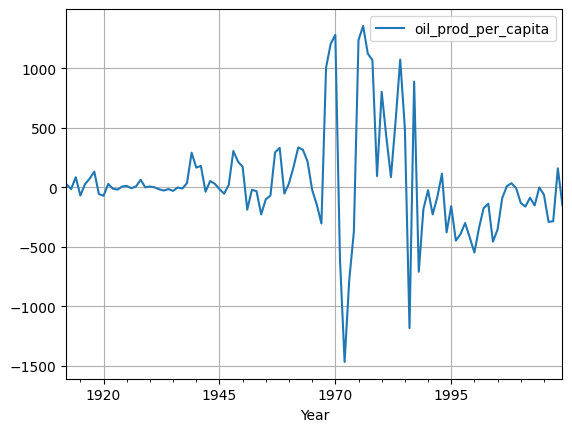

In [57]:
diff_df.plot(grid=True)

In [58]:
adf_test(diff_df)

Hasil dari Testing Dickey-Fuller
----------------------------------------
Test statistic               -2.905984
p=value                       0.044657
Lags Used                     5.000000
Number of Obseration Use    102.000000
Critical Value(1%)           -3.496149
Critical Value(5%)           -2.890321
Critical Value(10%)          -2.582122
dtype: float64


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


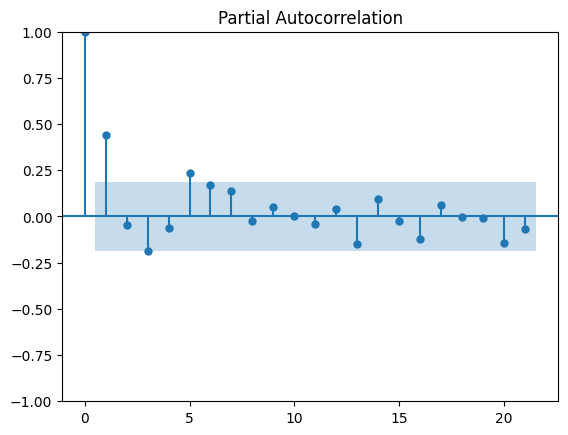

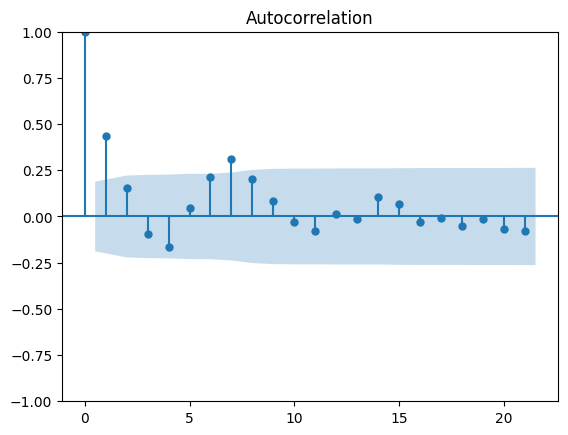

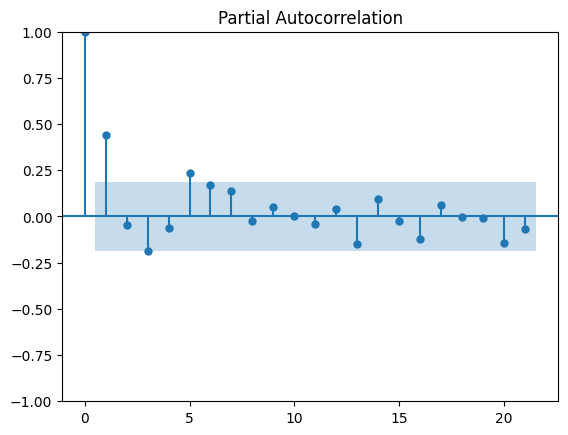

In [59]:
plot_acf(diff_df)
plot_pacf(diff_df)

Setelah melihat hasil grafik dan plot Auto Correlation dan Partial Auto Correlation diatas, maka dapat disimpulkan bahwa data tersebut adalah stasioner.
Sehingga langkah selanjutnya adalah mengimlementasikan Algoritma pada deret waktu dari dataset yang digunakan.

# DATA PROCESSING AND EVALUATION

# Single Exponential Smoothing (Algoritma Pertama)

In [60]:
single_exp =SimpleExpSmoothing(train_df).fit()
single_exp_train_pred = single_exp.fittedvalues
single_exp_test_pred = single_exp.forecast(9)

<Axes: xlabel='Year'>

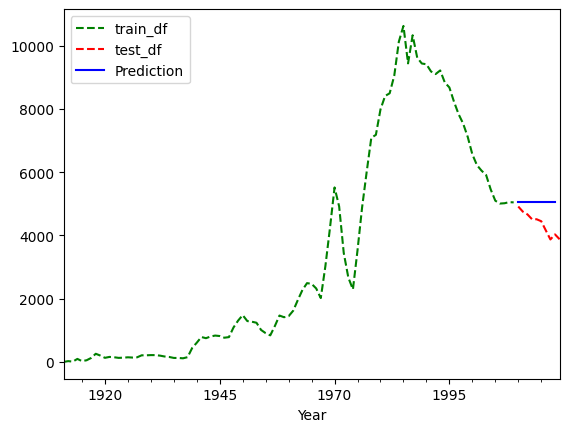

In [61]:
train_df['oil_prod_per_capita'].plot(style='--', color='green', legend = True, label = 'train_df')
test_df['oil_prod_per_capita'].plot(style='--', color= 'r', legend= True, label= 'test_df')
single_exp_test_pred.plot(color='b', legend= True, label= 'Prediction')

# Hasil prediksi untuk algoritma pertama yaitu Single Exponential Smoothing terlihat garis prediksi (warna biru) cukup jauh dengan garis grafik data test (warna merah)

# Double Exponential Smoothing (Algoritma Ke-2)

In [62]:
double_exp = ExponentialSmoothing (train_df, trend=None, initialization_method='heuristic', seasonal='add', seasonal_periods=29, damped_trend=False).fit()
double_exp_train_pred = double_exp.fittedvalues
double_exp_test_pred = double_exp.forecast(9)

<Axes: xlabel='Year'>

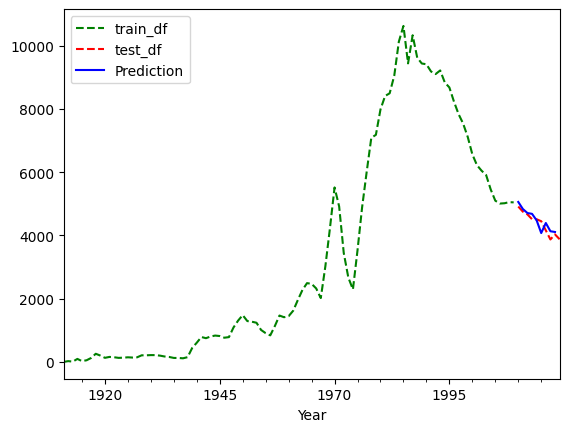

In [63]:
train_df['oil_prod_per_capita'].plot(style='--', color='green', legend = True, label = 'train_df')
test_df['oil_prod_per_capita'].plot(style='--', color='r', legend =True, label='test_df')
double_exp_test_pred.plot(color='b', legend= True, label= 'Prediction')

# Hasil prediksi untuk algoritma ke-2 yaitu Double Exponential Smoothing terlihat garis prediksi (warna biru) relatif mendekati terhadap garis grafik data test (warna merah)

# ARIMA (Algoritma Ke-3)

In [64]:
ar=ARIMA(train_df, order=(15,1,12)).fit()
ar_train_pred = ar.fittedvalues
ar_test_pred = ar.forecast(9)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Year'>

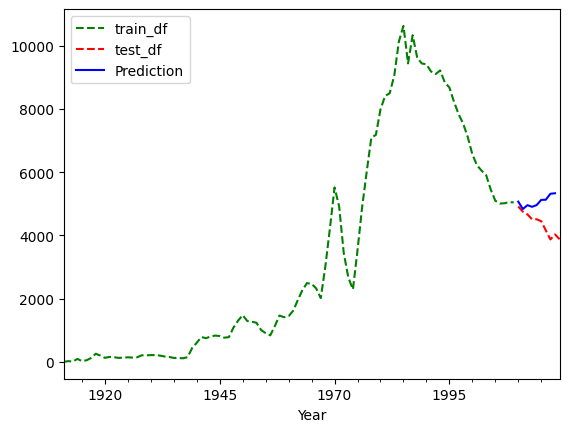

In [65]:
train_df['oil_prod_per_capita'].plot(style='--', color='green', legend = True, label = 'train_df')
test_df['oil_prod_per_capita'].plot(style='--', color='r', legend =True, label='test_df')
ar_test_pred.plot(color='b', legend= True, label= 'Prediction')

# Hasil prediksi untuk algoritma pertama yaitu ARIMA terlihat garis prediksi (warna biru) sangat jauh dengan garis grafik data test (warna merah)

Dari Ke-tiga visualisasi Algoritma diatas, Algoritma Double Exponential Smoothing memiliki garis prediksi yang mendekati gari data set. Sehingga dapat dikatakan bahwa Algoritma Double Exponential Smoothing lebih efektif digunakan.

In [38]:
double_exp = ExponentialSmoothing (df, trend=None, initialization_method='heuristic', seasonal='add', seasonal_periods=29, damped_trend=False).fit()
double_exp_pred = double_exp.forecast(20)

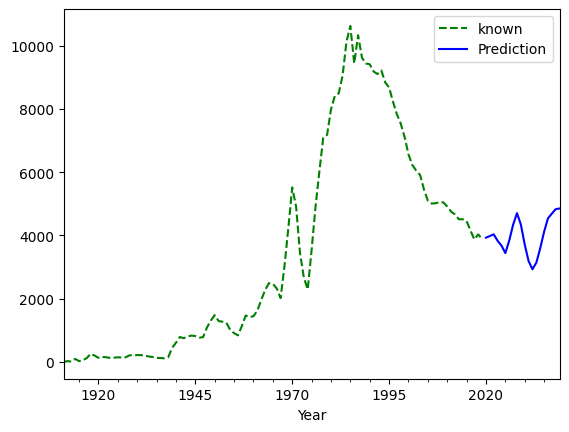

In [39]:
df['oil_prod_per_capita'].plot(style='--', color='green', legend = True, label = 'known')
double_exp_pred.plot(color='b', legend= True, label= 'Prediction')
plt.show()


# DEPLOYMENT AND SAVE DATA

Deployment menggunakan streamlit sebagai interface dan Github memiliki fungsi agar program ini dapat dilihat secara terbuka di internet.

Tujuan dilakukan nya Import Pickle adalah untuk dapat dilakukannya penyimpanan data kedalam sebuah file.

In [66]:
import pickle

In [33]:
pickle.dump(double_exp, open('Prediksi_Prod_Minyak_Mesir.sav','wb'))